# 数据读取与分析

In [7]:
import numpy as np
import pandas as pd
from pandas import datetime

#data viz & missing value
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

#ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

#importing data
data = pd.read_csv('/Users/meininghang/autos.csv',na_values='?')
data.columns

/var/folders/hz/hf5qxb2j7sdcz1bnsz3b26mr0000gn/T/ipykernel_24124/4167529691.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling'],
      dtype='object')

In [8]:
data.dtypes

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
dtype: object

In [9]:
#first glance at the data itself
print('In total: ', data.shape)
data.head()

In total:  (205, 26)


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


一个较小的数据集：只有205条数据，26个特征。

In [10]:
data.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


# 缺失值处理

<AxesSubplot:>

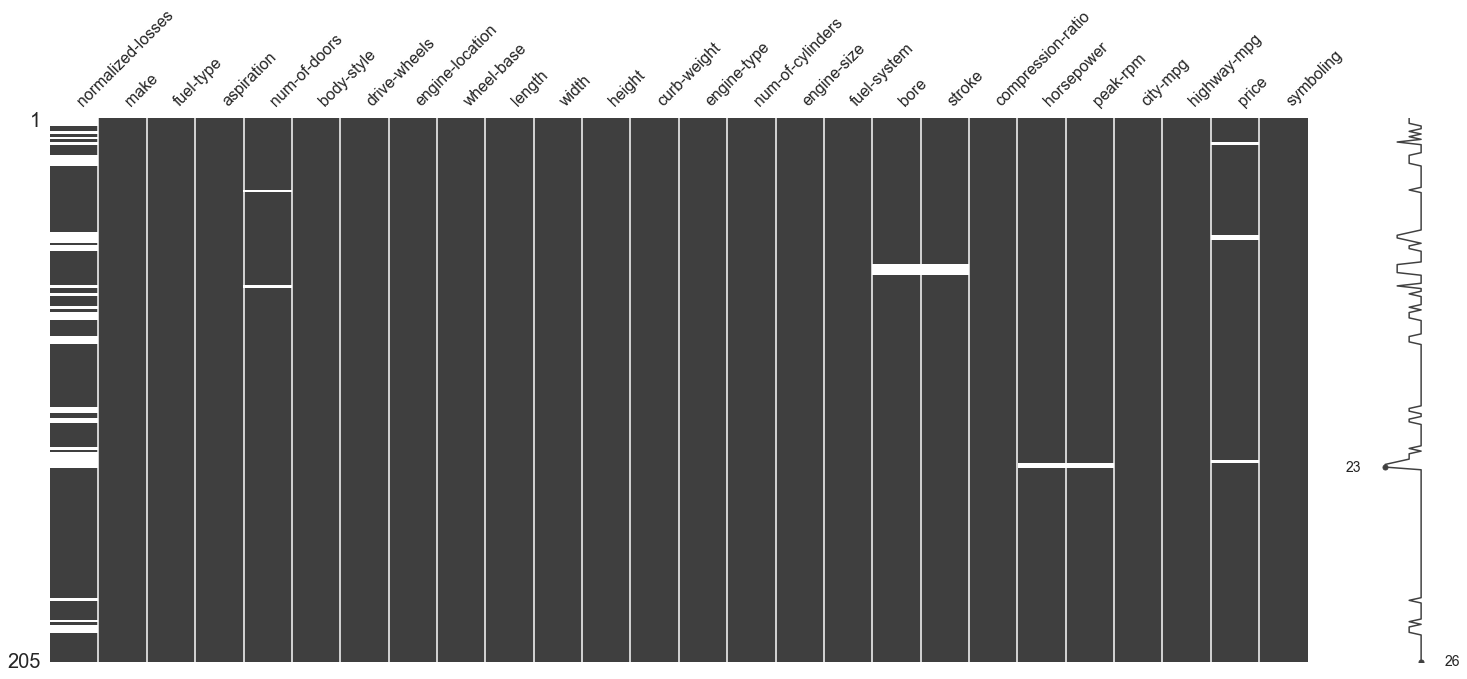

In [13]:
#missing value

sns.set(style="ticks")

msno.matrix(data)

normalized-losses 缺失比较严重

In [14]:
data[pd.isnull(data['normalized-losses'])].head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
5,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,2
7,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,1


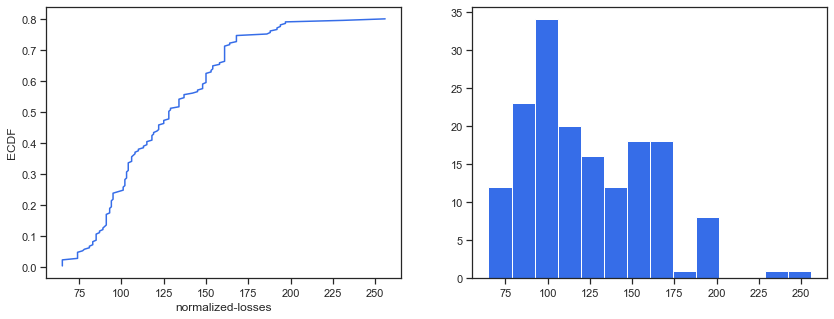

In [17]:
sns.set(style='ticks')
plt.figure(figsize=(14,5))
c = '#366DE8'

#ECDF
plt.subplot(121)
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y, label='statmodels', color=c);
plt.xlabel('normalized-losses');
plt.ylabel('ECDF');

#overall distribution
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(),
        bins=int(np.sqrt(len(data['normalized-losses']))),
        color=c);

In [18]:
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [20]:
#replacing
data = data.dropna(subset=['price','bore','stroke','peak-rpm','horsepower','num-of-doors'])
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x:x.fillna(x.mean()))

print('In total:', data.shape)
data.head()

In total: (193, 26)


/var/folders/hz/hf5qxb2j7sdcz1bnsz3b26mr0000gn/T/ipykernel_24124/206543007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x:x.fillna(x.mean()))


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


# 特征相关性

In [21]:
cormatrix = data.corr()
cormatrix

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
normalized-losses,1.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602,0.593658
wheel-base,-0.167286,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,-0.536516
length,-0.038857,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,-0.363194
width,0.034178,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649,-0.247741
height,-0.445925,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234,-0.517803
curb-weight,0.085758,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368,-0.231086
engine-size,0.152544,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778,-0.068327
bore,0.032765,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295,-0.144785
stroke,0.057834,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007,-0.010884
compression-ratio,-0.149620,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483,-0.175160


In [23]:
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T #返回函数的上三角矩阵，把对角线上的置0，让他们不是最高的。
cormatrix

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
normalized-losses,0.0,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602,0.593658
wheel-base,-0.0,0.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,-0.536516
length,-0.0,0.000000,0.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,-0.363194
width,0.0,0.000000,0.000000,0.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649,-0.247741
height,-0.0,0.000000,0.000000,0.000000,0.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234,-0.517803
curb-weight,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368,-0.231086
engine-size,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778,-0.068327
bore,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295,-0.144785
stroke,0.0,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007,-0.010884
compression-ratio,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483,-0.175160


In [24]:
cormatrix = cormatrix.stack()
cormatrix

normalized-losses  normalized-losses    0.000000
                   wheel-base          -0.167286
                   length              -0.038857
                   width                0.034178
                   height              -0.445925
                                          ...   
symboling          peak-rpm             0.000000
                   city-mpg             0.000000
                   highway-mpg          0.000000
                   price               -0.000000
                   symboling            0.000000
Length: 256, dtype: float64

In [25]:
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix

,level_0,level_1,0
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
...,...,...,...
251,compression-ratio,height,0.000000
252,compression-ratio,curb-weight,0.000000
253,compression-ratio,engine-size,0.000000
254,compression-ratio,bore,-0.000000


In [27]:
cormatrix.columns = ['FirstVariable','SecondVariable','Correlation']
cormatrix.head(10)

,FirstVariable,SecondVariable,Correlation
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


相关性过高取其一即可，某些参数，如长宽高可合并。

In [32]:
data['volume'] = data.length * data.width * data.height

data.drop(['width', 'length', 'height','curb-weight','city-mpg'],axis=1,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'length'

In [33]:
data.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg',
       'price', 'symboling', 'volume'],
      dtype='object')

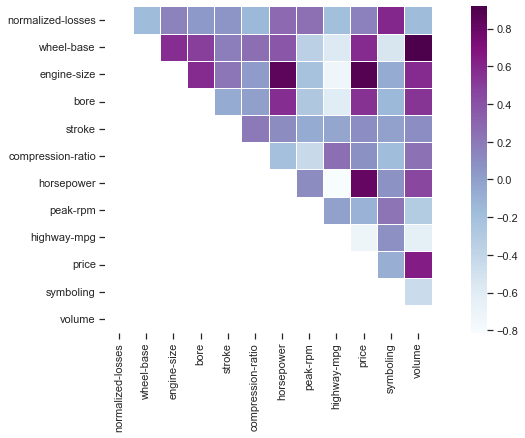

In [36]:
#compute the correlation matrix
corr_all = data.corr()

#generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=np.bool_)
mask[np.tril_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,6))

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, square=True, linewidths=.5, ax=ax, cmap='BuPu')
plt.show()

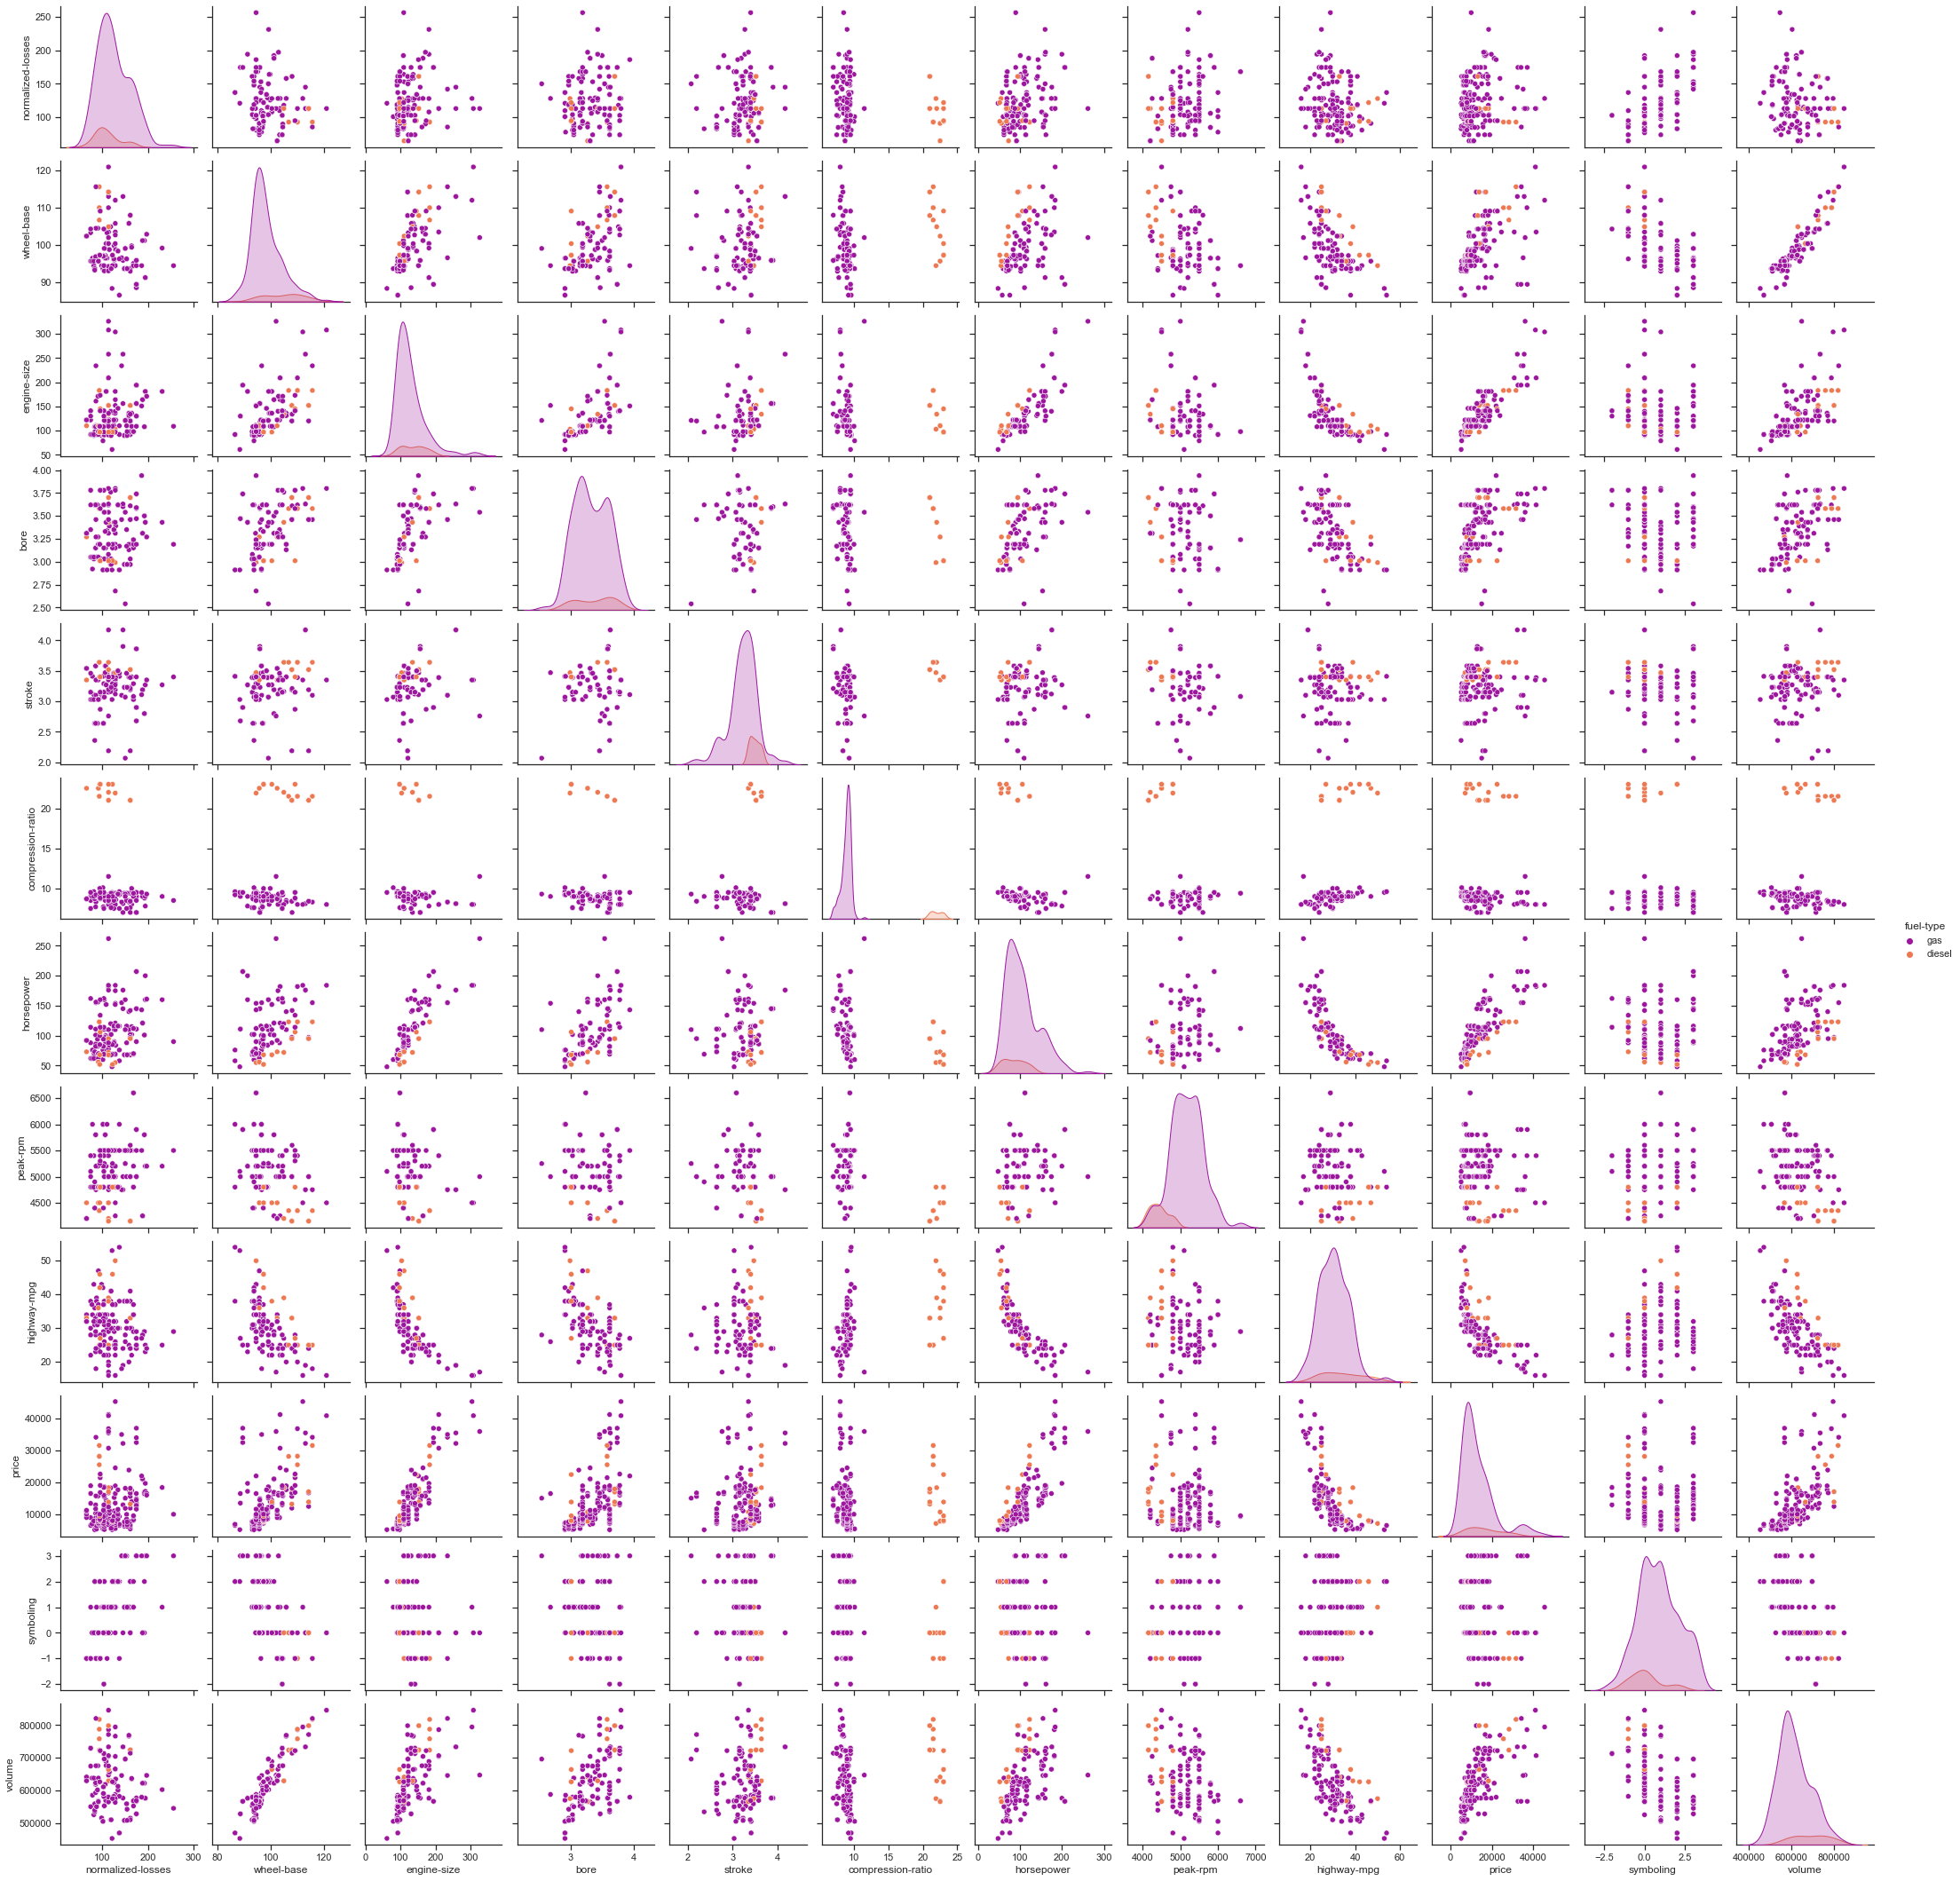

In [37]:
sns.pairplot(data, hue='fuel-type', palette='plasma')

查看两个变量之间的关系

/Users/meininghang/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


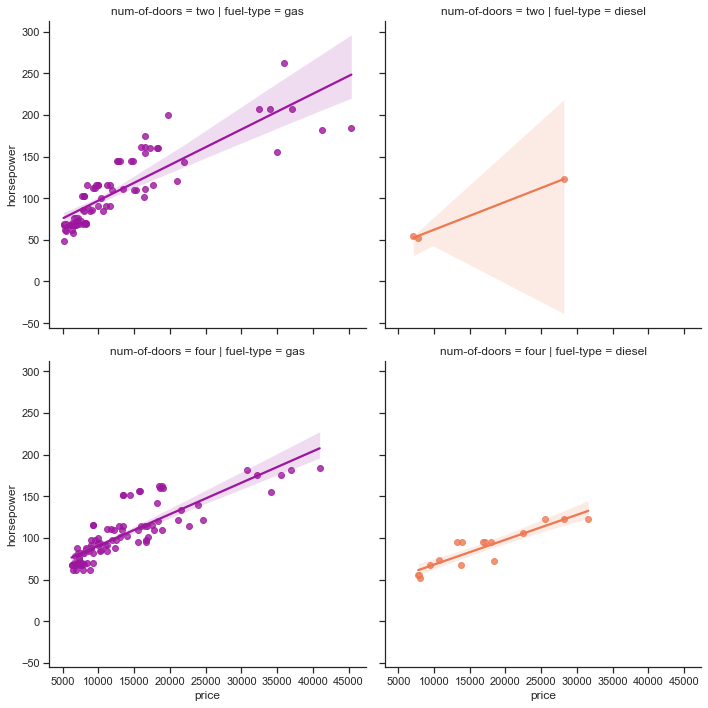

In [39]:
sns.lmplot('price','horsepower',data,
          hue='fuel-type',col='fuel-type',row='num-of-doors',
          palette='plasma',fit_reg=True);

# 预处理

## 对连续值进行标准化

In [40]:
# target and features

target = data.price

regressors = [x for x in data.columns if x not in ['price']]
features = data.loc[:, regressors]

num = ['symboling', 'normalized-losses','volume','horsepower','wheel-base','bore','stroke','compression-ratio','peak-rpm']

#scale the data
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

#glimpse
features.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,symboling,volume
0,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,dohc,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,1.78685,-1.168294
1,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,dohc,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,1.78685,-1.168294
2,0.144710,alfa-romero,gas,std,two,hatchback,rwd,front,-0.720911,ohcv,six,152,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,0.16397,-0.422041
3,1.178276,audi,gas,std,four,sedan,fwd,front,0.142781,ohc,four,109,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.97541,0.169527
4,1.178276,audi,gas,std,four,sedan,4wd,front,0.077596,ohc,five,136,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.97541,0.193551


对离散值进行one-hot编码

In [41]:
# categorical vars
classes = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

#create new data with only continios vars
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes,axis=1)

#new dataset
print('In total:', features.shape)
features.head()

In total: (193, 66)


,normalized-losses,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,symboling,volume,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.477685,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,1.78685,-1.168294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1.477685,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,1.78685,-1.168294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.144710,-0.720911,152,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,0.16397,-0.422041,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1.178276,0.142781,109,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.97541,0.169527,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.178276,0.077596,136,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.97541,0.193551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


划分数据集

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=seed)

print('Train', X_train.shape, 'and test', X_test.shape)

Train (135, 66) and test (58, 66)


## Lasso回归

多加了一个绝对值来惩罚过大的系数，α=0就是OLS

In [47]:
alphas = 2. ** np.arange(2,12)
scores = np.empty_like(alphas)

lassocv = LassoCV(cv=10, random_state=seed)
lassocv.fit(features,target)
lassocv_score = lassocv.score(features,target)
lassocv_alpha = lassocv.alpha_

CV results: 0.8319664351572907 342.0081418966275


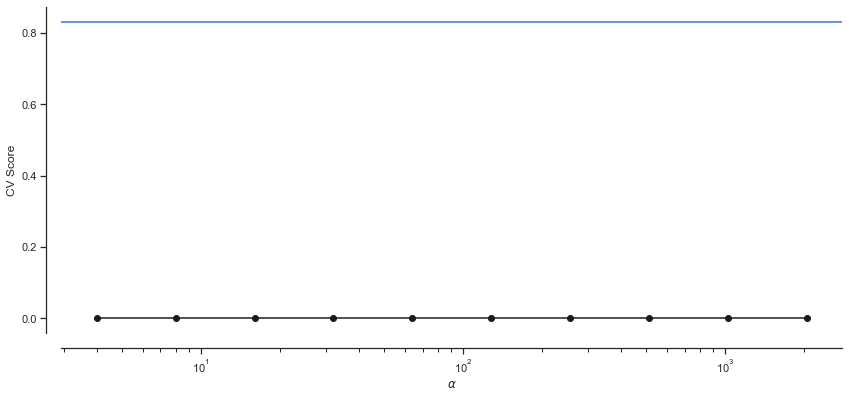

In [49]:
plt.figure(figsize=(14,6))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color=c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log')
sns.despine(offset=15)

print('CV results:', lassocv_score, lassocv_alpha)